In [1]:
# import library yg diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# open data
df = pd.read_csv("data/flights_with_category.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21604865 entries, 0 to 21604864
Data columns (total 33 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ElapsedDelay         float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
isOntime     

# Performance Schedule flights in the United States 2006-2008
by: Rya Meyvriska

### Project Overview

Performance flights can be measure with number of Ontime, Delay, Cancelled, and Diverted Flights. This project want to analyze what the performance of flights in US at 2006 until 2007. The data can be found in http://stat-computing.org/dataexpo/2009/the-data.html

### Bibliography

<ol>
    <li><a href="#a1">Total Number of Flights in each Year</a></li>
    <li><a href="#a2">The Average and Distribution of Distance</a></li>
    <li><a href="#a3">The Average of Flights Time</a></li>
    <li><a href="#a4">Bad Performance Schedule Flights</a></li>
    <li><a href="#a5">The Reason of Delay</a></li>
    <li><a href="#a6">The Correlation of Departure Delay and Arrival Delay</a></li>
    <li><a href="#a7">The Reason of Cancelled</a></li>
    <li><a href="#a8">Origin of The Most Delayed and The Least Delayed</a></li>
    <li><a href="#a9">Origin of The Most Delayed and The Least Cancelled</a></li>
    <li><a href="#a10">Origin of The Most Delayed and The Least Diverted</a></li>
    <li><a href="#a11">Trends of Ontime, Delay, Cancelled and Departure</a></li>
    <li><a href="#summary">Summary</a></li></li>
</ol>

<a id="a1"></a>
### Total Number of Flights in each Year

In 2006 until 2008, US have more than 7 thousand flight in each year. In that three years, 2008 have smallest count of flights. The different total of flights can be more than 1 hundred in each year. 

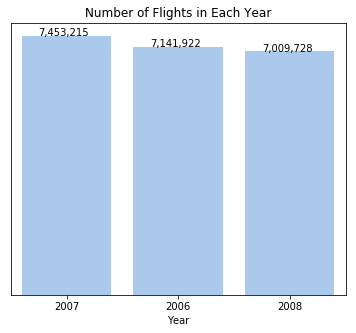

In [3]:
plt.figure(figsize=(6,5))

plt.title('Number of Flights in Each Year')
plt.xlabel('Year')

base_color = sb.color_palette("pastel")[0]
cat_order = df['Year'].value_counts().index

ax = sb.countplot(data = df, x = 'Year', color = base_color, order = cat_order) #(df.Year.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.get_yaxis().set_visible(False)

for p in ax.patches:
    ax.annotate('{:,}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.15))

<a id="a2"></a>
### The Average and Distribution of Distance

With previous total number of flights, the average flights distance is 7.24 miles with distribution is skewed but the log distribution was normal. So it's mean there are doesn't axist any significant outlier distance in each country.

In [4]:
def plot_distribution_and_log(column, title_label, adding_bin, x_label):
    # make space
    plt.figure(figsize = [12,5])
    base_color = sb.color_palette("pastel")[0]

    # figure left
    plt.subplot(1,2,1)
    bin_edges = np.arange(0, df[column].max()+adding_bin,adding_bin)
    plt.hist(data=df, x = column, bins = bin_edges, color =base_color)
    plt.title('Distribution of {}'.format(title_label))
    plt.xlabel(x_label)

    # figure right
    plt.subplot(1,2,2)
    plt.hist(data=df, x = column, bins = bin_edges, color=base_color)
    plt.xscale('log')
    plt.title('Distribution of log({})'.format(title_label))
    plt.xlabel('log({})'.format(x_label));

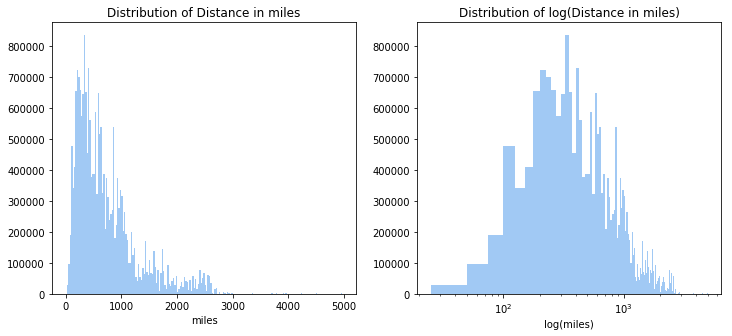

In [5]:
plot_distribution_and_log('Distance','Distance in miles', 25, 'miles')

<a id="a3"></a>
### The Average of Flights Time

In each year, average flights time is 103 minutes or 1.7 hours. The log distribution in flight time also normal. So it's mean there are no any outlier or flight time that extremely fast or extremely long-time.

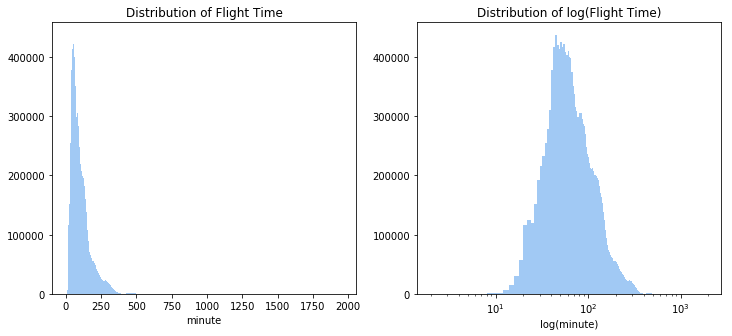

In [6]:
plot_distribution_and_log('AirTime','Flight Time', 2, 'minute')

<a id="a4"></a>
### Bad Performance Schedule Flights

In three years, most bad performance was delayed with total ~3 million of flights, and than cancelled with 4 hundred of flights, and diverted with 5 thousand of flights.

In [7]:
def plot_bad_performance():
    # set figure size, title, and base color
    plt.figure(figsize=(6,5))

    plt.title('Bad Performance Schedule Flights in 2006-2008')

    base_color = sb.color_palette("pastel")[0]

    # set the data
    dict_status = {'Delayed':len(df.query('isDelay ==1')), \
                     'Cancelled':len(df.query('Cancelled==1')), \
                     'Diverted':len(df.query('Diverted==1'))}

    data = pd.DataFrame(dict_status, index=['Schedule Flights'])

    # set the plotting
    ax = sb.barplot(data=data, color = base_color) 
    ax.get_yaxis().set_visible(False)

    # add number in top of bar
    for p in ax.patches:
        ax.annotate('{:,}'.format(int(p.get_height())), (p.get_x()+0.15, p.get_height()+0.15))

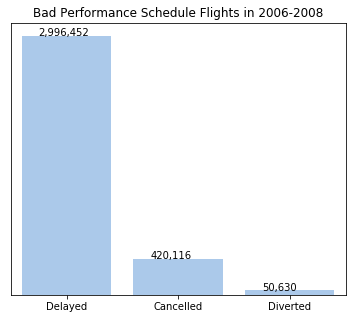

In [8]:
plot_bad_performance()

<a id="a5"></a>
### The Reason of Delay

In average of three year, the total delay because of Late Aircraft is ~34 million, which is the most reason of delay. The second place is National Air System Delay with total ~27 million of flights.

In [9]:
def plot_reason_delay():
    # set figure size, title, and base color
    plt.figure(figsize=(6,5))

    plt.title('The Reason of Delay')
    plt.xticks(rotation='30')

    base_color = sb.color_palette("pastel")[0]

    # set the data
    dict_status = {'Delayed':len(df.query('isDelay ==1')), \
                     'Cancelled':len(df.query('Cancelled==1')), \
                     'Diverted':len(df.query('Diverted==1'))}

    data = df.groupby('Year')[['LateAircraftDelay', 'NASDelay', 'CarrierDelay','WeatherDelay','SecurityDelay']].sum()

    # set the plotting
    ax = sb.barplot(data=data, color = base_color, ci=None)
    ax.get_yaxis().set_visible(False)

    # add number in top of bar
    for p in ax.patches:
        ax.annotate('{:,}'.format(int(p.get_height())), (p.get_x(), p.get_height()+0.15))

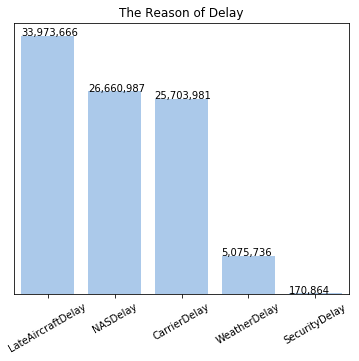

In [10]:
plot_reason_delay()

<a id="a6"></a>
### The Correlation of Departure Delay and Arrival Delay
The departure and arrival correlations are very hight, so the highest option is when one of other Delay so the other will also be delayed. If the flights has departure delay, so the highest possible is flights arrival will be delay. But some flights doesn't Delay in departure have delay in arrival.

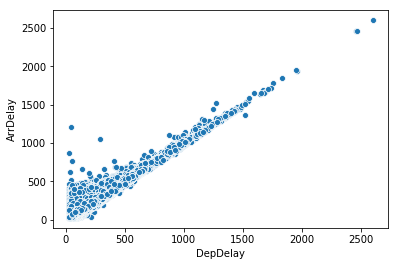

In [11]:
# From https://en.wikipedia.org/wiki/Flight_cancellation_and_delay
# the flight is delay if the different is lower than 25 minutes. 
# So I assumed the flights is on time when the air flight < 25 minutes.
sb.scatterplot(data=df.query('ArrDelay > 25 & DepDelay > 25'), x='DepDelay', y='ArrDelay');

<a id="a7"></a>
### The Reason of Cancelled

The most reason of Cancelled flights in each year is carrier. In some month like Desember, and Februari, many flights was cancelled because of Weather. So it may can be consideration from customer if they want to buy some ticket in that month.

In [12]:
def plot_time_vs_column(time, column, size, nlargest=3):
    # group by time, check nlargest value count
    value = df[column].groupby(df[time]).value_counts()
    value_year = value.groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True)

    # to make easy plot, change into unstack and plot it
    # unfoturnatly, value in unstack is ordered by column name
    unstack = value_year.unstack(fill_value=0)
    unstack.plot(kind = 'bar', sort_columns=column, color = sb.color_palette("pastel"), figsize=size);
    plt.legend(loc=2, bbox_to_anchor=(1, 0.5), ncol = 3, framealpha = 1, title = column)
    plt.xticks(rotation=0)
    plt.title('{} in each {}'.format(column,time));

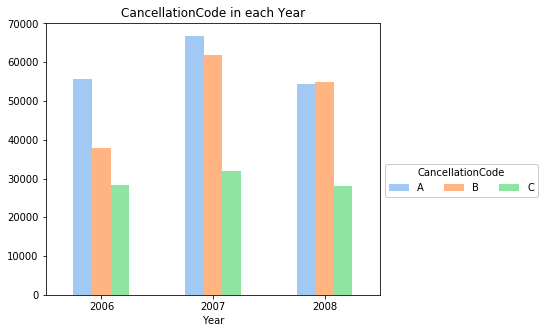

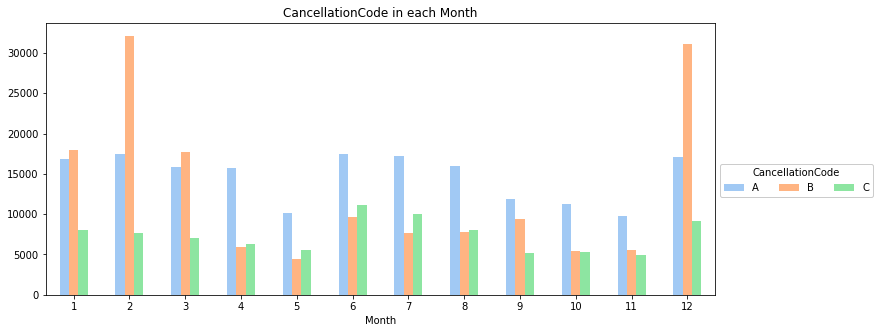

In [13]:
# plot for year
plot_time_vs_column('Year','CancellationCode', [6,5]);

# plot for month
plot_time_vs_column('Month','CancellationCode',[12,5]);

<a id="a8"></a>
### Origin of The Most Delayed and The Least Delayed
In three years, the most delayed and ontime Origin is same. They are Atlanta (ATL), Chicago (DFW), and then Dallas (ORD).

In [14]:
# make function so it can be reusable
def plot_most_and_least(category, label):
    value = df['Origin'].groupby(df[category]).value_counts()
    value_data = value.groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True)
    
    unstack = value_data.unstack(fill_value=0)
    
    unstack.plot(kind = 'bar', sort_columns='Origin', color = sb.color_palette("pastel"))
    plt.xticks(rotation=0)
    plt.xlabel('0 = Not {}, 1 = {}'.format(label,label))
    plt.legend(loc=2, bbox_to_anchor=(1, 0.5), ncol = 3, framealpha = 1, title = 'Origin')
    plt.title('Origin most and least {}'.format(label));

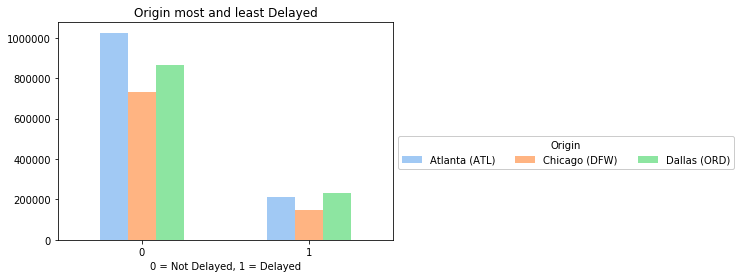

In [15]:
plot_most_and_least('isDelay', 'Delayed');
plt.legend(['Atlanta (ATL)', 'Chicago (DFW)',  'Dallas (ORD)'], loc=2, bbox_to_anchor=(1, 0.5), ncol = 3, framealpha = 1, title = 'Origin');


<a id="a9"></a>
### Origin of The Most Cancelled and The Least Cancelled
In three years, the most cancelled origin airport is Dallas, and not cancelled Origin is Atlanta.

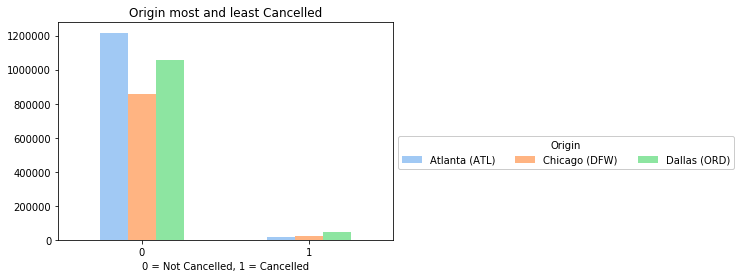

In [16]:
plot_most_and_least('Cancelled', 'Cancelled');
plt.legend(['Atlanta (ATL)', 'Chicago (DFW)',  'Dallas (ORD)'], loc=2, bbox_to_anchor=(1, 0.5), ncol = 3, framealpha = 1, title = 'Origin');


<a id="a10"></a>
### Origin of The Most Diverted and The Least Diverted
In three years, the most diverted and not diverted Origin is same. They are Atlanta (ATL), Chicago (DFW), and then Dallas (ORD).

In [17]:
# make function so it can be reusable
def plot_most(category, label, isCategory):
    value = df.query('Diverted=={}'.format(isCategory))['Origin'].groupby(df[category]).value_counts()
    value_data = value.groupby(level=[0]).nlargest(3).reset_index(level=0, drop=True)
    
    unstack = value_data.unstack(fill_value=0)
    
    unstack.plot(kind = 'bar', sort_columns='Origin', color = sb.color_palette("pastel"))
    plt.xticks(rotation=0)
    plt.legend(loc=2, bbox_to_anchor=(1, 0.5), ncol = 3, framealpha = 1, title = category)
    plt.title('Origin {}'.format(label));

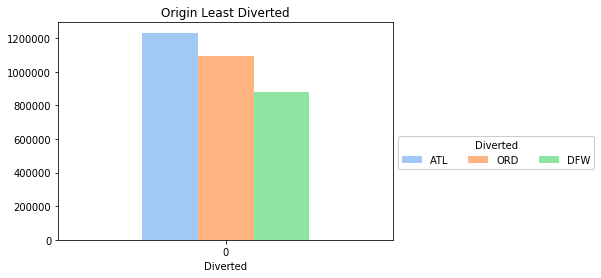

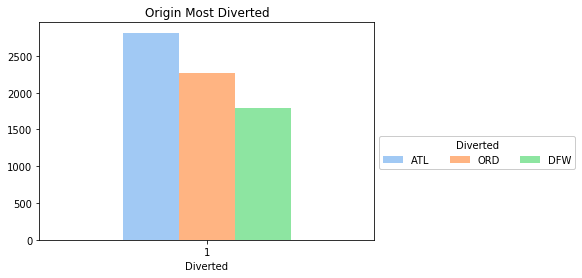

In [18]:
plot_most('Diverted', 'Least Diverted',0);

plot_most('Diverted', 'Most Diverted',1);

<a id="a11"></a>
### Trends of Ontime, Delay, Cancelled and Departure

The number of Delay and Cancelled in 2007 increase but decrease in 2008. Diverted has a bad trends because that is always increase in 2006-2008.

In [19]:
def plot_trend(column, label):
    sb.lineplot(data=df, x = 'Year', y = column).axes.get_yaxis().set_visible(False);
    plt.title('Flights {} Behaviour in Year'.format(label));

In [20]:
def plot_all_trends():
    # make plot
    plt.figure(figsize = [12,12])

    # plot ontime
    plt.subplot(2,2,1)
    plot_trend('isOntime', 'Ontime');

    # plot Delay
    plt.subplot(2,2,2)
    plot_trend('isDelay', 'Delay');

    # plot cancell
    plt.subplot(2,2,3)
    plot_trend('Cancelled', 'Cancelled');

    # plot diverted
    plt.subplot(2,2,4)
    plot_trend('Diverted', 'Diverted');

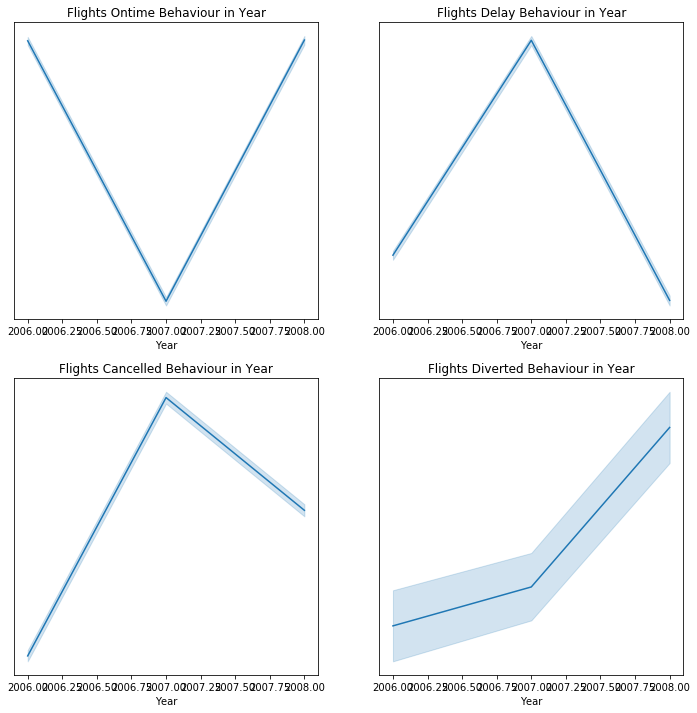

In [21]:
plot_all_trends()

<a id="summary"></a>
### Summary

In three years, most bad performance was delayed with total ~3 million of flights, and than cancelled with 4 hundred of flights, and diverted with 5 thousand of flights.In average of three year, the total delay because of Late Aircraft is ~34 million, which is the most reason of delay. The second place is National Air System Delay with total ~27 million of flights.The departure and arrival correlations are very hight, so the highest option is when one of other Delay so the other will also be delayed. If the flights has departure delay, so the highest possible is flights arrival will be delayed. But some flights doesn't Delay in departure have delay in arrival.The most reason of Cancelled flights in each year is carrier. In some month like Desember, and Februari, many flights was cancelled because of Weather. So it may can be consideration from customer if they want to buy some ticket in that month. Atlanta (ATL), Chicago (DFW), and then Dallas (ORD) are the most origin delayed, ontime, diverted, and not diverted. It's mean the total number of that three flights is huge. The most cancelled origin airport is Dallas, and not cancelled origin aorport is Atlanta. From the trends, delayed and cancelled is decrase but flights diverted is increase over year.